In [109]:
from pycaret.datasets import get_data
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
import pandas as pd
import numpy as np

In [110]:
df = get_data(dataset = 'index')
df

Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         telescope  Multivariate   
18                           titanic  Multivariate   
19  us_presidential_election_results  Multivariate   
20                             glass  Multivariate   
21                              iris  Multivariate   
22                             poker  Multivariate   
23                         questions  Multivariate   
24                         satellite  Multivariate   
25                               CTG  Multivariate   
26                          asia_gdp  Multivariate   
27                         elections  Multivariate   
28                          facebook  Multivariate   
29                               ipl  Multivariate   
30                         jewellery  Multivariate   
31                              mice  Multivariate   
32                         migration  Multivariate   
33                           perfume  Multivariate   
34                           pokemon  Multivariate   
35                        population  Multivariate   
36                     public_health  Multivariate   
37                             seeds  Multivariate   
38                         wholesale  Multivariate   
39                            tweets          Text   
40                            amazon          Text   
41                              kiva          Text   
42                               spx          Text   
43                         wikipedia          Text   
44                        automobile  Multivariate   
45                              bike  Multivariate   
46                            boston  Multivariate   
47                          concrete  Multivariate   
48                           diamond  Multivariate   
49                            energy  Multivariate   
50                            forest  Multivariate   
51                              gold  Multivariate   
52                             house  Multivariate   
53                         insurance  Multivariate   
54                        parkinsons  Multivariate   
55                           traffic  Multivariate   

                   Default Task Target Variable 1 Target Variable 2  \
0             Anomaly Detection              None              None   
1       Association Rule Mining         InvoiceNo       Description   
2       Association Rule Mining         InvoiceNo       Description   
3       Classification (Binary)           deposit              None   
4       Classification (Binary)             Class              None   
5       Classification (Binary)             Class              None   
6       Classification (Binary)           default              None   
7       Classification (Binary)    Class variable              None   
8       Classification (Binary)             stabf              None   
9       Classification (Binary)              left              None   
10      Classification (Binary)             DEATH              None   
11      Classification (Binary)           Disease              None   
12      Classification (Bin

Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         telescope  Multivariate   
18                           titanic  Multivariate   
19  us_presidential_election_results  Multivariate   
20                             glass  Multivariate   
21                              iris  Multivariate   
22                             poker  Multivariate   
23                         questions  Multivariate   
24                         satellite  Multivariate   
25                               CTG  Multivariate   
26                          asia_gdp  Multivariate   
27                         elections  Multivariate   
28                          facebook  Multivariate   
29                               ipl  Multivariate   
30                         jewellery  Multivariate   
31                              mice  Multivariate   
32                         migration  Multivariate   
33                           perfume  Multivariate   
34                           pokemon  Multivariate   
35                        population  Multivariate   
36                     public_health  Multivariate   
37                             seeds  Multivariate   
38                         wholesale  Multivariate   
39                            tweets          Text   
40                            amazon          Text   
41                              kiva          Text   
42                               spx          Text   
43                         wikipedia          Text   
44                        automobile  Multivariate   
45                              bike  Multivariate   
46                            boston  Multivariate   
47                          concrete  Multivariate   
48                           diamond  Multivariate   
49                            energy  Multivariate   
50                            forest  Multivariate   
51                              gold  Multivariate   
52                             house  Multivariate   
53                         insurance  Multivariate   
54                        parkinsons  Multivariate   
55                           traffic  Multivariate   

                   Default Task Target Variable 1 Target Variable 2  \
0             Anomaly Detection              None              None   
1       Association Rule Mining         InvoiceNo       Description   
2       Association Rule Mining         InvoiceNo       Description   
3       Classification (Binary)           deposit              None   
4       Classification (Binary)             Class              None   
5       Classification (Binary)             Class              None   
6       Classification (Binary)           default              None   
7       Classification (Binary)    Class variable              None   
8       Classification (Binary)             stabf              None   
9       Classification (Binary)              left              None   
10      Classification (Binary)             DEATH              None   
11      Classification (Binary)           Disease              None   
12      Classification (Bin

In [111]:
df = get_data(dataset = 'bike', profile=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [112]:
train, test = train_test_split(df, test_size=0.1, random_state=42, shuffle=True)

In [113]:
dataset = setup(data = train, target = 'cnt', normalize = True, preprocess = True)

In [114]:
best = compare_models(exclude = ['lightgbm'])

Initiated  . . . . . . . . . . . . . . . . . .              15:49:54
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

In [115]:
tuned_best = tune_model(estimator = best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [116]:
predictions = predict_model(tuned_best, data=test)

In [117]:
predictions

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
12830    12831   6/23/2012       3   1     6  19        0        6   
8688      8689    1/2/2012       1   1     1  20        1        1   
7091      7092  10/28/2011       4   0    10   2        0        5   
12230    12231   5/29/2012       2   1     5  19        0        2   
431        432   1/20/2011       1   0     1   0        0        4   
...        ...         ...     ...  ..   ...  ..      ...      ...   
2069      2070    4/1/2011       2   0     4   2        0        5   
5431      5432   8/19/2011       3   0     8   5        0        5   
4119      4120   6/25/2011       3   0     6  13        0        6   
7132      7133  10/29/2011       4   0    10  19        0        6   
11351    11352   4/23/2012       2   1     4   4        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  cnt  \
12830           0           1  0.80  0.6970  0.27     0.1940  425   
8688            0           1  0.24  0.2273  0.41     0.2239   88   
7091            1           1  0.32  0.3030  0.66     0.2836    4   
12230           1           1  0.78  0.7121  0.52     0.3582  526   
431             1           1  0.26  0.2273  0.56     0.3881   13   
...           ...         ...   ...     ...   ...        ...  ...   
2069            1           3  0.26  0.2576  0.93     0.1940    7   
5431            1           1  0.64  0.5758  0.83     0.0000   17   
4119            0           1  0.74  0.6515  0.40     0.2836  371   
7132            0           1  0.24  0.2121  0.87     0.3582   39   
11351           1           3  0.30  0.2879  0.81     0.2836    3   

       prediction_label  
12830        359.077495  
8688          72.664660  
7091           7.004785  
12230        489.502360  
431           22.350325  
...                 ...  
2069          -2.165098  
5431          24.495733  
4119         413.556166  
7132          61.707087  
11351        -19.745414  

[1738 rows x 16 columns]

In [118]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

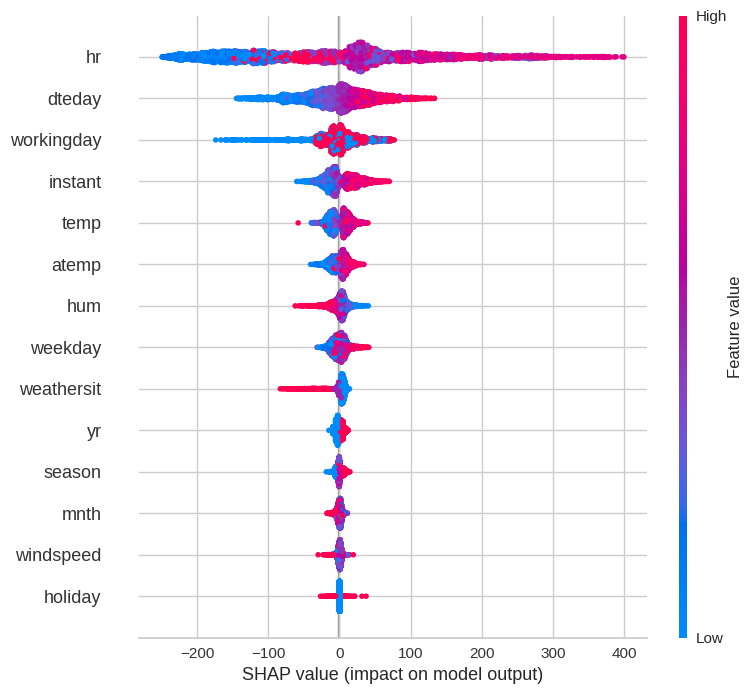

In [119]:
interpret_model(tuned_best)

In [120]:
data = [[17379, '2012-12-31 00:00:00', 4, 1, 12, 23, 1, 6, 1, 4, 1, 1, 1, 1]]
tst = pd.DataFrame (data, columns= ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])
tst

instant               dteday  season  yr  mnth  hr  holiday  weekday  \
0    17379  2012-12-31 00:00:00       4   1    12  23        1        6   

   workingday  weathersit  temp  atemp  hum  windspeed  
0           1           4     1      1    1          1

In [121]:
pred = predict_model(tuned_best, data=tst)

In [122]:
pred

instant               dteday  season  yr  mnth  hr  holiday  weekday  \
0    17379  2012-12-31 00:00:00       4   1    12  23        1        6   

   workingday  weathersit  temp  atemp  hum  windspeed  prediction_label  
0           1           4     1      1    1          1        173.970559